In [22]:
import pandas as pd
import re as re
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
%matplotlib inline

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [132]:
with open("modified_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [152]:
df['y'] = df['FantPt']

In [153]:
df_train = df[df['date'] < '2017-02-01']
df_test = df[df['date'] > '2017-02-01']

In [154]:
player_list = []
for player in df_test.player.unique():
    if np.mean(df_test[df_test['player'] == player].FantPt) > 1:
        if np.mean(df_train[df_train['player'] == player].FantPt) > 1:
            player_list.append(player)
    

In [155]:
len(player_list)

333

In [156]:
df_train.columns

Index(['player', 'age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp',
       ...
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'y'],
      dtype='object', length=101)

In [157]:
df_train_reduced = df_train.drop(['age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA', 'team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS','opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'opponent_LAR', 'opponent_MIA', 'opponent_MIN', 'opponent_NOR',
       'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
       'opponent_PHI', 'opponent_PIT', 'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS'],1)
df_test_reduced = df_test.drop(['age', 'date', 'game', 'week', 'FantPt', 'ppr', 'DKPT',
       'FDPT', 'cmp', 'att', 'pyds', 'ptds', 'int', 'ruatt', 'ruyds', 'rutds',
       'rec', 'reyds', 'retds', 'fum', 'FGM', 'FGA', 'XPM', 'XPA','team_ARI',
       'team_ATL', 'team_BAL', 'team_BUF', 'team_CAR', 'team_CHI', 'team_CIN',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GNB', 'team_HOU',
       'team_IND', 'team_JAX', 'team_KAN', 'team_LAC', 'team_LAR', 'team_MIA',
       'team_MIN', 'team_NOR', 'team_NWE', 'team_NYG', 'team_NYJ', 'team_OAK',
       'team_PHI', 'team_PIT', 'team_SDG', 'team_SEA', 'team_SFO', 'team_STL',
       'team_TAM', 'team_TEN', 'team_WAS','opponent_ARI',
       'opponent_ATL', 'opponent_BAL', 'opponent_BUF', 'opponent_CAR',
       'opponent_CHI', 'opponent_CIN', 'opponent_CLE', 'opponent_DAL',
       'opponent_DEN', 'opponent_DET', 'opponent_GNB', 'opponent_HOU',
       'opponent_IND', 'opponent_JAX', 'opponent_KAN', 'opponent_LAC',
       'opponent_LAR', 'opponent_MIA', 'opponent_MIN', 'opponent_NOR',
       'opponent_NWE', 'opponent_NYG', 'opponent_NYJ', 'opponent_OAK',
       'opponent_PHI', 'opponent_PIT', 'opponent_SDG', 'opponent_SEA',
       'opponent_SFO', 'opponent_STL', 'opponent_TAM', 'opponent_TEN',
       'opponent_WAS'],1)

In [158]:
datelist_1 = pd.date_range(pd.datetime.today(), periods=df_train_reduced.shape[0]).tolist()
datelist_2 = pd.date_range(pd.datetime.today(), periods=df_test_reduced.shape[0]).tolist()

In [160]:
df_test_reduced['index'] = datelist_2
df_train_reduced['index'] = datelist_1

In [161]:
df_train_reduced.set_index('index', inplace=True)
df_test_reduced.set_index('index', inplace=True)

In [163]:
df_test_reduced.columns


Index(['player', 'op_rank', 'h/a_', 'h/a_@', 'day_Mon', 'day_Sat', 'day_Sun',
       'day_Thu', 'y'],
      dtype='object')

In [195]:
point_list = []
for player in player_list:
    df_test_player = df_test_reduced[df_test_reduced['player'] == player]
    df_test_player = df_test_player.drop(['player','op_rank'],1)
    df_train_player = df_train_reduced[df_train_reduced['player'] == player]
    df_train_player = df_train_player.drop(['player','op_rank'],1)
    if df_train_player.shape[0] < 20:
        continue
    model = sm.tsa.ARMA(df_train_player.y, (0,1), exog = df_train_player.drop('y',1))
    results = model.fit()
    #p = results.forecast(steps = df_test_player.shape[0] ,exog=df_test_player.drop('y',1))
    p = results.predict(start = 1, end = df_test_player.shape[0],exog=df_test_player.drop('y',1)).values


    
    point_list.append((player,p))

    
    

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Convers

In [196]:
point_list

[('A.J. Green',
  array([10.76225173, 12.52994855, 14.28404225, 11.59781746, 10.13015848,
         14.88181351, 13.61585436, 14.19556571, 11.63167429, 12.2084143 ,
          5.52542951, 14.6313322 , 14.94714995, 12.30023746, 14.22647288,
         11.80572759])),
 ('Aaron Rodgers',
  array([21.79475678, 23.86966416, 17.24325152, 20.83827547, 20.78738887,
         25.16633082, 21.35698354])),
 ('Adam Humphries',
  array([2.40635803, 3.35120999, 2.06645035, 4.02988206, 4.88906786,
         2.44868019, 4.43584198, 3.31802371, 3.20452106, 8.55786393,
         3.26894228, 2.49698402, 2.40525848, 4.09130185, 5.34709545,
         6.16933932])),
 ('Adam Thielen',
  array([1.91128208, 2.54122206, 2.01250285, 3.37802566, 3.5695525 ,
         2.00423158, 2.50565579, 2.02310655, 2.49960943, 2.02504339,
         2.17706298, 2.12836595, 2.46589128, 2.35777048, 2.45487989,
         2.93181501])),
 ('Adam Vinatieri',
  array([10.73902081,  8.15157476,  9.15199688,  8.23710971,  6.23226887,
          8.

In [197]:
from sklearn.metrics import mean_squared_error


residual_list = []
for index, player in enumerate(point_list):
    y = df_test_reduced[df_test_reduced['player'] == player[0]].y
    yhat = player[1]
    residual_list.append((player[0],np.sqrt(mean_squared_error(y, yhat))))

In [203]:
from operator import itemgetter

max(residual_list, key=itemgetter(1))

('Todd Gurley', 16.75458366823782)

In [199]:
df_test_reduced[df_test_reduced['player'] == 'Todd Gurley']

,player,op_rank,h/a_,h/a_@,day_Mon,day_Sat,day_Sun,day_Thu,y
index,,,,,,,,,
2075-08-29 18:29:14.971158,Todd Gurley,27,1,0,0,0,1,0,15.6
2075-08-30 18:29:14.971158,Todd Gurley,29,1,0,0,0,1,0,23.6
2075-08-31 18:29:14.971158,Todd Gurley,30,0,1,0,0,0,1,32.9
2075-09-01 18:29:14.971158,Todd Gurley,30,0,1,0,0,0,1,32.9
2075-09-02 18:29:14.971158,Todd Gurley,9,0,1,0,0,1,0,27.5
2075-09-03 18:29:14.971158,Todd Gurley,1,1,0,0,0,1,0,3.0
2075-09-04 18:29:14.971158,Todd Gurley,15,0,1,0,0,1,0,12.0
2075-09-05 18:29:14.971158,Todd Gurley,4,1,0,0,0,1,0,21.4
2075-09-06 18:29:14.971158,Todd Gurley,28,0,1,0,0,1,0,22.4


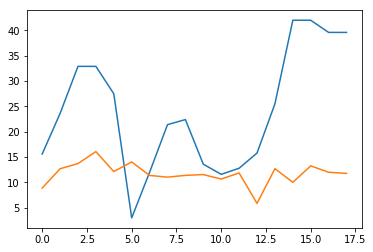

In [200]:
plt.plot(df_test_reduced[df_test_reduced['player'] == 'Todd Gurley'].y.values)
plt.plot([ 8.88816876, 12.69401707, 13.7232291 , 16.07786719, 12.13967788,
         14.04514286, 11.38027954, 11.04168478, 11.39417648, 11.54896622,
         10.66640185, 11.87285563,  5.86217146, 12.71520962, 10.01978768,
         13.26990592, 12.00955545, 11.78108991])